# Logistic Regression Models

In [1]:
%matplotlib inline
import numpy as np
from cross_validation import cross_validation
from polynomial import build_poly
import matplotlib.pyplot as plt
from implementations import logistic_regression
from proj1_helpers import predict_labels
from cross_validation import accuracy

In [2]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train_10.npy")
print(X_train.shape)
print(y_train.shape)

(250000, 13)
(250000,)


# Splitting into 2 classifiers

We split the dataset using PRI_jet_num column

In [3]:
X_pri_01 = X_train[(X_train[:, -1] == 0) | (X_train[:, -1] == 1) ,:-1]
X_pri_23 = X_train[(X_train[:, -1] == 2) | (X_train[:, -1] == 3),:-1]

y_pri_01 = y_train[(X_train[:, -1] == 0) | (X_train[:, -1] == 1)].reshape(-1,1)
y_pri_23 = y_train[(X_train[:, -1] == 2) | (X_train[:, -1] == 3)].reshape(-1,1)

In [4]:
print("PRI_01: {}".format(X_pri_01.shape))
print("PRI_23: {}".format(X_pri_23.shape))

print("\ny_PRI_01: {}".format(y_pri_01.shape))
print("y_PRI_23: {}".format(y_pri_23.shape))

PRI_01: (177457, 12)
PRI_23: (72543, 12)

y_PRI_01: (177457, 1)
y_PRI_23: (72543, 1)


In [5]:
selected_features = np.array([1,3,9,10,11,13,21,22])
selected_features = np.sort(np.append(selected_features, [0,4,5,6,12]))
print(selected_features)

[ 0  1  3  4  5  6  9 10 11 12 13 21 22]


In [6]:
delete_columns = []

for i in range(X_pri_01.shape[1]):
    if np.isin(True, (X_pri_01[:,i] == -999)):
        delete_columns.append(i)
        
delete_columns

[3, 4, 5, 9]

In [7]:
X_pri_01 = np.delete(X_pri_01, np.s_[delete_columns], axis=1)  
X_pri_01.shape

(177457, 8)

In [8]:
print("PRI_01: {}".format(X_pri_01.shape))
print("PRI_23: {}".format(X_pri_23.shape))

PRI_01: (177457, 8)
PRI_23: (72543, 12)


# Logistic Regression Models w/ Gradient Descent for 2 subsets

In [9]:
degrees = np.linspace(2, 10, 9).astype(int)
max_iter = [1000]
gamma = [1e-5]

pars = {'degrees': degrees,
       'max_iter': max_iter,
       'gamma': gamma}

# Model training

### Training for PRI_01 subset

degree=9, gam=1e-5

In [10]:
pri01_tr_acc, pri01_te_acc = cross_validation(y_pri_01, X_pri_01, 3, h_pars=pars, model='log')

deg:2-itr:1000-gam:1e-05 completed
deg:3-itr:1000-gam:1e-05 completed
deg:4-itr:1000-gam:1e-05 completed
deg:5-itr:1000-gam:1e-05 completed
deg:6-itr:1000-gam:1e-05 completed
deg:7-itr:1000-gam:1e-05 completed
deg:8-itr:1000-gam:1e-05 completed
deg:9-itr:1000-gam:1e-05 completed
deg:10-itr:1000-gam:1e-05 completed


In [11]:
pri01_te_acc 

array([[1.00000000e+03, 1.00000000e-05, 2.00000000e+00, 5.10961847e-01],
       [1.00000000e+03, 1.00000000e-05, 3.00000000e+00, 5.12251586e-01],
       [1.00000000e+03, 1.00000000e-05, 4.00000000e+00, 5.10809610e-01],
       [1.00000000e+03, 1.00000000e-05, 5.00000000e+00, 5.11998400e-01],
       [1.00000000e+03, 1.00000000e-05, 6.00000000e+00, 5.11236277e-01],
       [1.00000000e+03, 1.00000000e-05, 7.00000000e+00, 5.10875625e-01],
       [1.00000000e+03, 1.00000000e-05, 8.00000000e+00, 5.11098174e-01],
       [1.00000000e+03, 1.00000000e-05, 9.00000000e+00, 5.10540472e-01],
       [1.00000000e+03, 1.00000000e-05, 1.00000000e+01, 5.10585970e-01]])

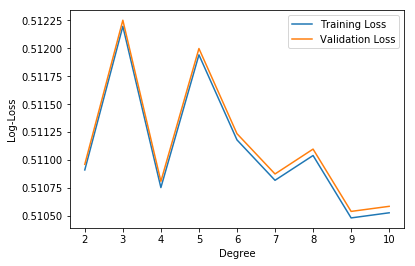

In [13]:
plt.plot(pri01_tr_acc[:,2], pri01_tr_acc[:,3], label='Training Loss')
plt.plot(pri01_te_acc[:,2], pri01_te_acc[:,3], label='Validation Loss')
plt.xlabel('Degree')
plt.ylabel('Log-Loss')
plt.legend()

In [20]:
np.random.seed(23)
initial_w = np.random.normal(0,1,build_poly(X_pri_01, 9).shape[1]).reshape(-1,1)
w, losses = logistic_regression(y_pri_01, build_poly(X_pri_01, 9), initial_w, 14000, 1e-5)

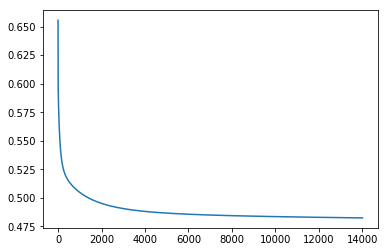

In [22]:
plt.plot(losses)

In [23]:
y_ = predict_labels(w, build_poly(X_pri_01, 9), model='log')
y_[y_ == -1] = 0
print("Training acc: {}".format(accuracy(y_, y_pri_01)))

Training acc: 0.768157919946804


### Training for PRI_23 subset

degree=9, gam=1e-5

In [25]:
pri23_tr_acc, pri23_te_acc = cross_validation(y_pri_23, X_pri_23, 3, h_pars=pars, model='log')

deg:2-itr:1000-gam:1e-05 completed
deg:3-itr:1000-gam:1e-05 completed
deg:4-itr:1000-gam:1e-05 completed
deg:5-itr:1000-gam:1e-05 completed
deg:6-itr:1000-gam:1e-05 completed
deg:7-itr:1000-gam:1e-05 completed
deg:8-itr:1000-gam:1e-05 completed
deg:9-itr:1000-gam:1e-05 completed
deg:10-itr:1000-gam:1e-05 completed


In [26]:
pri23_te_acc

array([[1.00000000e+03, 1.00000000e-05, 2.00000000e+00, 5.62598555e-01],
       [1.00000000e+03, 1.00000000e-05, 3.00000000e+00, 5.54888096e-01],
       [1.00000000e+03, 1.00000000e-05, 4.00000000e+00, 5.55521503e-01],
       [1.00000000e+03, 1.00000000e-05, 5.00000000e+00, 5.53790683e-01],
       [1.00000000e+03, 1.00000000e-05, 6.00000000e+00, 5.52573519e-01],
       [1.00000000e+03, 1.00000000e-05, 7.00000000e+00, 5.51610105e-01],
       [1.00000000e+03, 1.00000000e-05, 8.00000000e+00, 5.52549331e-01],
       [1.00000000e+03, 1.00000000e-05, 9.00000000e+00, 5.50264163e-01],
       [1.00000000e+03, 1.00000000e-05, 1.00000000e+01, 5.51339889e-01]])

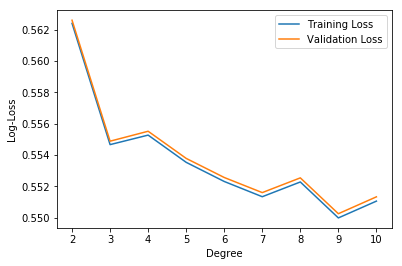

In [30]:
plt.plot(pri23_tr_acc[:,2], pri23_tr_acc[:,3], label='Training Loss')
plt.plot(pri23_te_acc[:,2], pri23_te_acc[:,3], label='Validation Loss')
plt.xlabel('Degree')
plt.ylabel('Log-Loss')
plt.legend()

In [33]:
np.random.seed(23)
initial_w = np.random.normal(0,1,build_poly(X_pri_23, 9).shape[1]).reshape(-1,1)
w, losses = logistic_regression(y_pri_23, build_poly(X_pri_23, 9), initial_w, 14000, 1e-5)

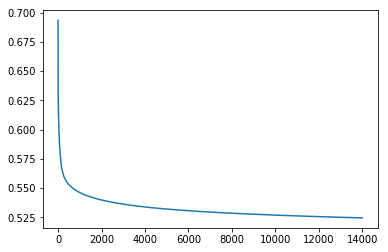

In [34]:
plt.plot(losses)

In [35]:
y_ = predict_labels(w, build_poly(X_pri_23, 9), model='log')
y_[y_ == -1] = 0
print("Training acc: {}".format(accuracy(y_, y_pri_23)))

Training acc: 0.7322691369256854
